In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
from statsmodels.distributions.empirical_distribution import ECDF

import plotly.express as px
import plotly.figure_factory as ff

import itertools

import os
from google.colab import files


In [2]:
# Upload dataset to Colab workspace
uploaded = files.upload()

Saving India_Statewise_Power_Infrastructure_Data_RBI.csv to India_Statewise_Power_Infrastructure_Data_RBI.csv


In [2]:
os.getcwd()

'/content'

In [3]:
os.listdir()

['.config',
 'India_Statewise_Power_Infrastructure_Data_RBI.csv',
 '.ipynb_checkpoints',
 'sample_data']

## Step 2.a

In [4]:
# Import the dataset into a DataFrame

power_infra = pd.read_csv('India_Statewise_Power_Infrastructure_Data_RBI.csv')
power_infra.head()

,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
0,Andaman and Nicobar Islands,2004-05,-,-,-,65
1,Andhra Pradesh,2004-05,5042,5006,656.9,10809
2,Arunachal Pradesh,2004-05,16,16,143.9,187
3,Assam,2004-05,379,358,134.4,1133
4,Bihar,2004-05,720,648,78,1644


In [5]:
power_infra.shape

(612, 6)

In [6]:
# Print the column headers

print(power_infra.columns)

Index(['State/Union Territory', 'Year', 'Power_Requirement_Net_Crore_Units',
       'Availability_Of_Power_Net_Crore_Units',
       'Availability_Of_Power_Per_Capita_kiloWatt-Hour',
       'Installed_Power_Capacity_MegaWatt'],
      dtype='object')


In [7]:
power_infra.columns.values

array(['State/Union Territory', 'Year',
       'Power_Requirement_Net_Crore_Units',
       'Availability_Of_Power_Net_Crore_Units',
       'Availability_Of_Power_Per_Capita_kiloWatt-Hour',
       'Installed_Power_Capacity_MegaWatt'], dtype=object)

## Step 2.b

In [8]:
power_infra.describe()

,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
count,612,612,612,612,612,612
unique,36,17,505,509,576,505
top,Andaman and Nicobar Islands,2004-05,24,.,.,.
freq,17,36,14,10,10,10


### To check for missing values

In [9]:
power_infra.isna().sum()    # Observation - There are no NaN values in the dataset

State/Union Territory                             0
Year                                              0
Power_Requirement_Net_Crore_Units                 0
Availability_Of_Power_Net_Crore_Units             0
Availability_Of_Power_Per_Capita_kiloWatt-Hour    0
Installed_Power_Capacity_MegaWatt                 0
dtype: int64

### To check for duplicate entries

In [10]:
power_infra[power_infra.duplicated(keep=False)]   # Observation - There are no duplicate values in the dataset

,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt


### To remove strings entered in numeric data fields

In [11]:
# Check the data types of each field

power_infra.dtypes

# Observation - The last 4 fields should be interger or float.
# However the observed data type 'object' indicates the presence of a likely string data in these numeric attribute fields

State/Union Territory                             object
Year                                              object
Power_Requirement_Net_Crore_Units                 object
Availability_Of_Power_Net_Crore_Units             object
Availability_Of_Power_Per_Capita_kiloWatt-Hour    object
Installed_Power_Capacity_MegaWatt                 object
dtype: object

In [12]:
power_infra.iloc[:, 2:].head()

,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
0,-,-,-,65
1,5042,5006,656.9,10809
2,16,16,143.9,187
3,379,358,134.4,1133
4,720,648,78,1644


In [13]:
power_infra['Power_Requirement_Net_Crore_Units'].unique()

#power_infra.iloc[:, 2].unique()

array(['-', '5042', '16', '379', '720', '116', '1175', '183', '112',
       '2116', '215', '5968', '2180', '400', '814', '363', '3516', '1269',
       '3481', '9272', '54', '137', '24', '33', '1398', '154', '3339',
       '2921', '4787', '.', '70', '5202', '463', '2316', '5303', '21',
       '405', '796', '126', '1301', '254', '135', '2160', '234', '5714',
       '2379', '430', '927', '403', '3460', '1367', '2', '3685', '10277',
       '51', '138', '23', '41', '1521', '168', '3568', '3205', '5419',
       '75', '5568', '516', '2494', '6096', '29', '843', '134', '1406',
       '292', '160', '2240', '262', '6246', '2625', '514', '1173', '437',
       '4080', '1502', '3', '3871', '11001', '45', '34', '1710', '181',
       '3864', '3324', '22', '6150', '80', '5744', '596', '2654', '6414',
       '39', '482', '916', '145', '1408', '339', '177', '2244', '274',
       '6875', '2935', '599', '1178', '4032', '1566', '4156', '11489',
       '53', '162', '38', '1885', '184', '4237', '3674', '6578

In [14]:
power_uniq = power_infra.iloc[:, 2:].apply(lambda col: col.unique())
power_uniq

Power_Requirement_Net_Crore_Units                 [-, 5042, 16, 379, 720, 116, 1175, 183, 112, 2...
Availability_Of_Power_Net_Crore_Units             [-, 5006, 16, 358, 648, 115, 1155, 183, 112, 2...
Availability_Of_Power_Per_Capita_kiloWatt-Hour    [-, 656.9, 143.9, 134.4, 78, 1274.7, 554.5, 82...
Installed_Power_Capacity_MegaWatt                 [65, 10809, 187, 1133, 1644, 79, 1633, 38, 14,...
dtype: object

In [15]:
# A function to check if the given string represents a decimal number

def isfloat(numpy_arr):
  N = len(numpy_arr)
  result_bool = np.empty(N, dtype = bool)
  for idx in range(N):
    string = numpy_arr[idx]
    try:
      float(string)
    except ValueError:
      result_bool[idx] = False
    else:
      result_bool[idx] = True
  return result_bool

In [16]:
# Verifying the functioning of isfloat() method

a = np.array(['12345', '4.99', '123ABC', '', '.','-'])
isfloat(a)

array([ True,  True, False, False, False, False])

In [17]:
power_uniq_bool = power_uniq.apply(lambda col: isfloat(col))
power_uniq_bool

Power_Requirement_Net_Crore_Units                 [False, True, True, True, True, True, True, Tr...
Availability_Of_Power_Net_Crore_Units             [False, True, True, True, True, True, True, Tr...
Availability_Of_Power_Per_Capita_kiloWatt-Hour    [False, True, True, True, True, True, True, Tr...
Installed_Power_Capacity_MegaWatt                 [True, True, True, True, True, True, True, Tru...
dtype: object

In [18]:
non_num_positions = []

for ind in range(len(power_uniq_bool)):
  col = power_uniq_bool[ind]
  false_pos = np.where(col == False)[0]
  non_num_positions.append(false_pos)
  print(false_pos)

[ 0 29]
[ 0 29]
[ 0 29]
[31]


In [19]:
non_nums_set = set()

for ind in range(len(non_num_positions)):
  non_num_pos_arr = non_num_positions[ind]
  for non_num_pos in non_num_pos_arr:
    non_nums_set.add(power_uniq[ind][non_num_pos])

print(non_nums_set)

{'.', '-'}


In [20]:
power_infra.replace({k: 0 for k in non_nums_set}, inplace = True)
power_infra.head()

,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
0,Andaman and Nicobar Islands,2004-05,0,0,0,65
1,Andhra Pradesh,2004-05,5042,5006,656.9,10809
2,Arunachal Pradesh,2004-05,16,16,143.9,187
3,Assam,2004-05,379,358,134.4,1133
4,Bihar,2004-05,720,648,78,1644


In [21]:
power_infra.dtypes

State/Union Territory                             object
Year                                              object
Power_Requirement_Net_Crore_Units                 object
Availability_Of_Power_Net_Crore_Units             object
Availability_Of_Power_Per_Capita_kiloWatt-Hour    object
Installed_Power_Capacity_MegaWatt                 object
dtype: object

In [22]:
power_uniq = power_infra.iloc[:, 2:].apply(lambda col: col.unique())
power_uniq_bool = power_uniq.apply(lambda col: isfloat(col))
if (False in power_uniq_bool) == False:
  print('There are no more symbols in fields which should ideally represent numbers.')

There are no more symbols in fields which should ideally represent numbers.


In [23]:
# Using a dictionary to convert the data type of columns

data_type_dict = {'State/Union Territory': 'category',
                'Year': 'category',
                'Power_Requirement_Net_Crore_Units': int,
                'Availability_Of_Power_Net_Crore_Units': int,
                'Availability_Of_Power_Per_Capita_kiloWatt-Hour': float,
                'Installed_Power_Capacity_MegaWatt': int
                }

power_infra = power_infra.astype(data_type_dict)
power_infra.dtypes

State/Union Territory                             category
Year                                              category
Power_Requirement_Net_Crore_Units                    int64
Availability_Of_Power_Net_Crore_Units                int64
Availability_Of_Power_Per_Capita_kiloWatt-Hour     float64
Installed_Power_Capacity_MegaWatt                    int64
dtype: object

### To check for potential outliers

In [24]:
power_infra.describe()

,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt
count,612.000000,612.000000,612.000000,612.000000
mean,2640.746732,2513.454248,1515.851634,6233.828431
std,3390.529156,3234.833732,2882.449324,8699.791107
min,0.000000,0.000000,0.000000,0.000000
25%,152.000000,138.000000,408.800000,237.500000
50%,982.500000,887.500000,746.250000,2317.000000
75%,4337.000000,4082.750000,1384.225000,8897.500000
max,15829.000000,15816.000000,20064.400000,44166.000000


<Axes: >

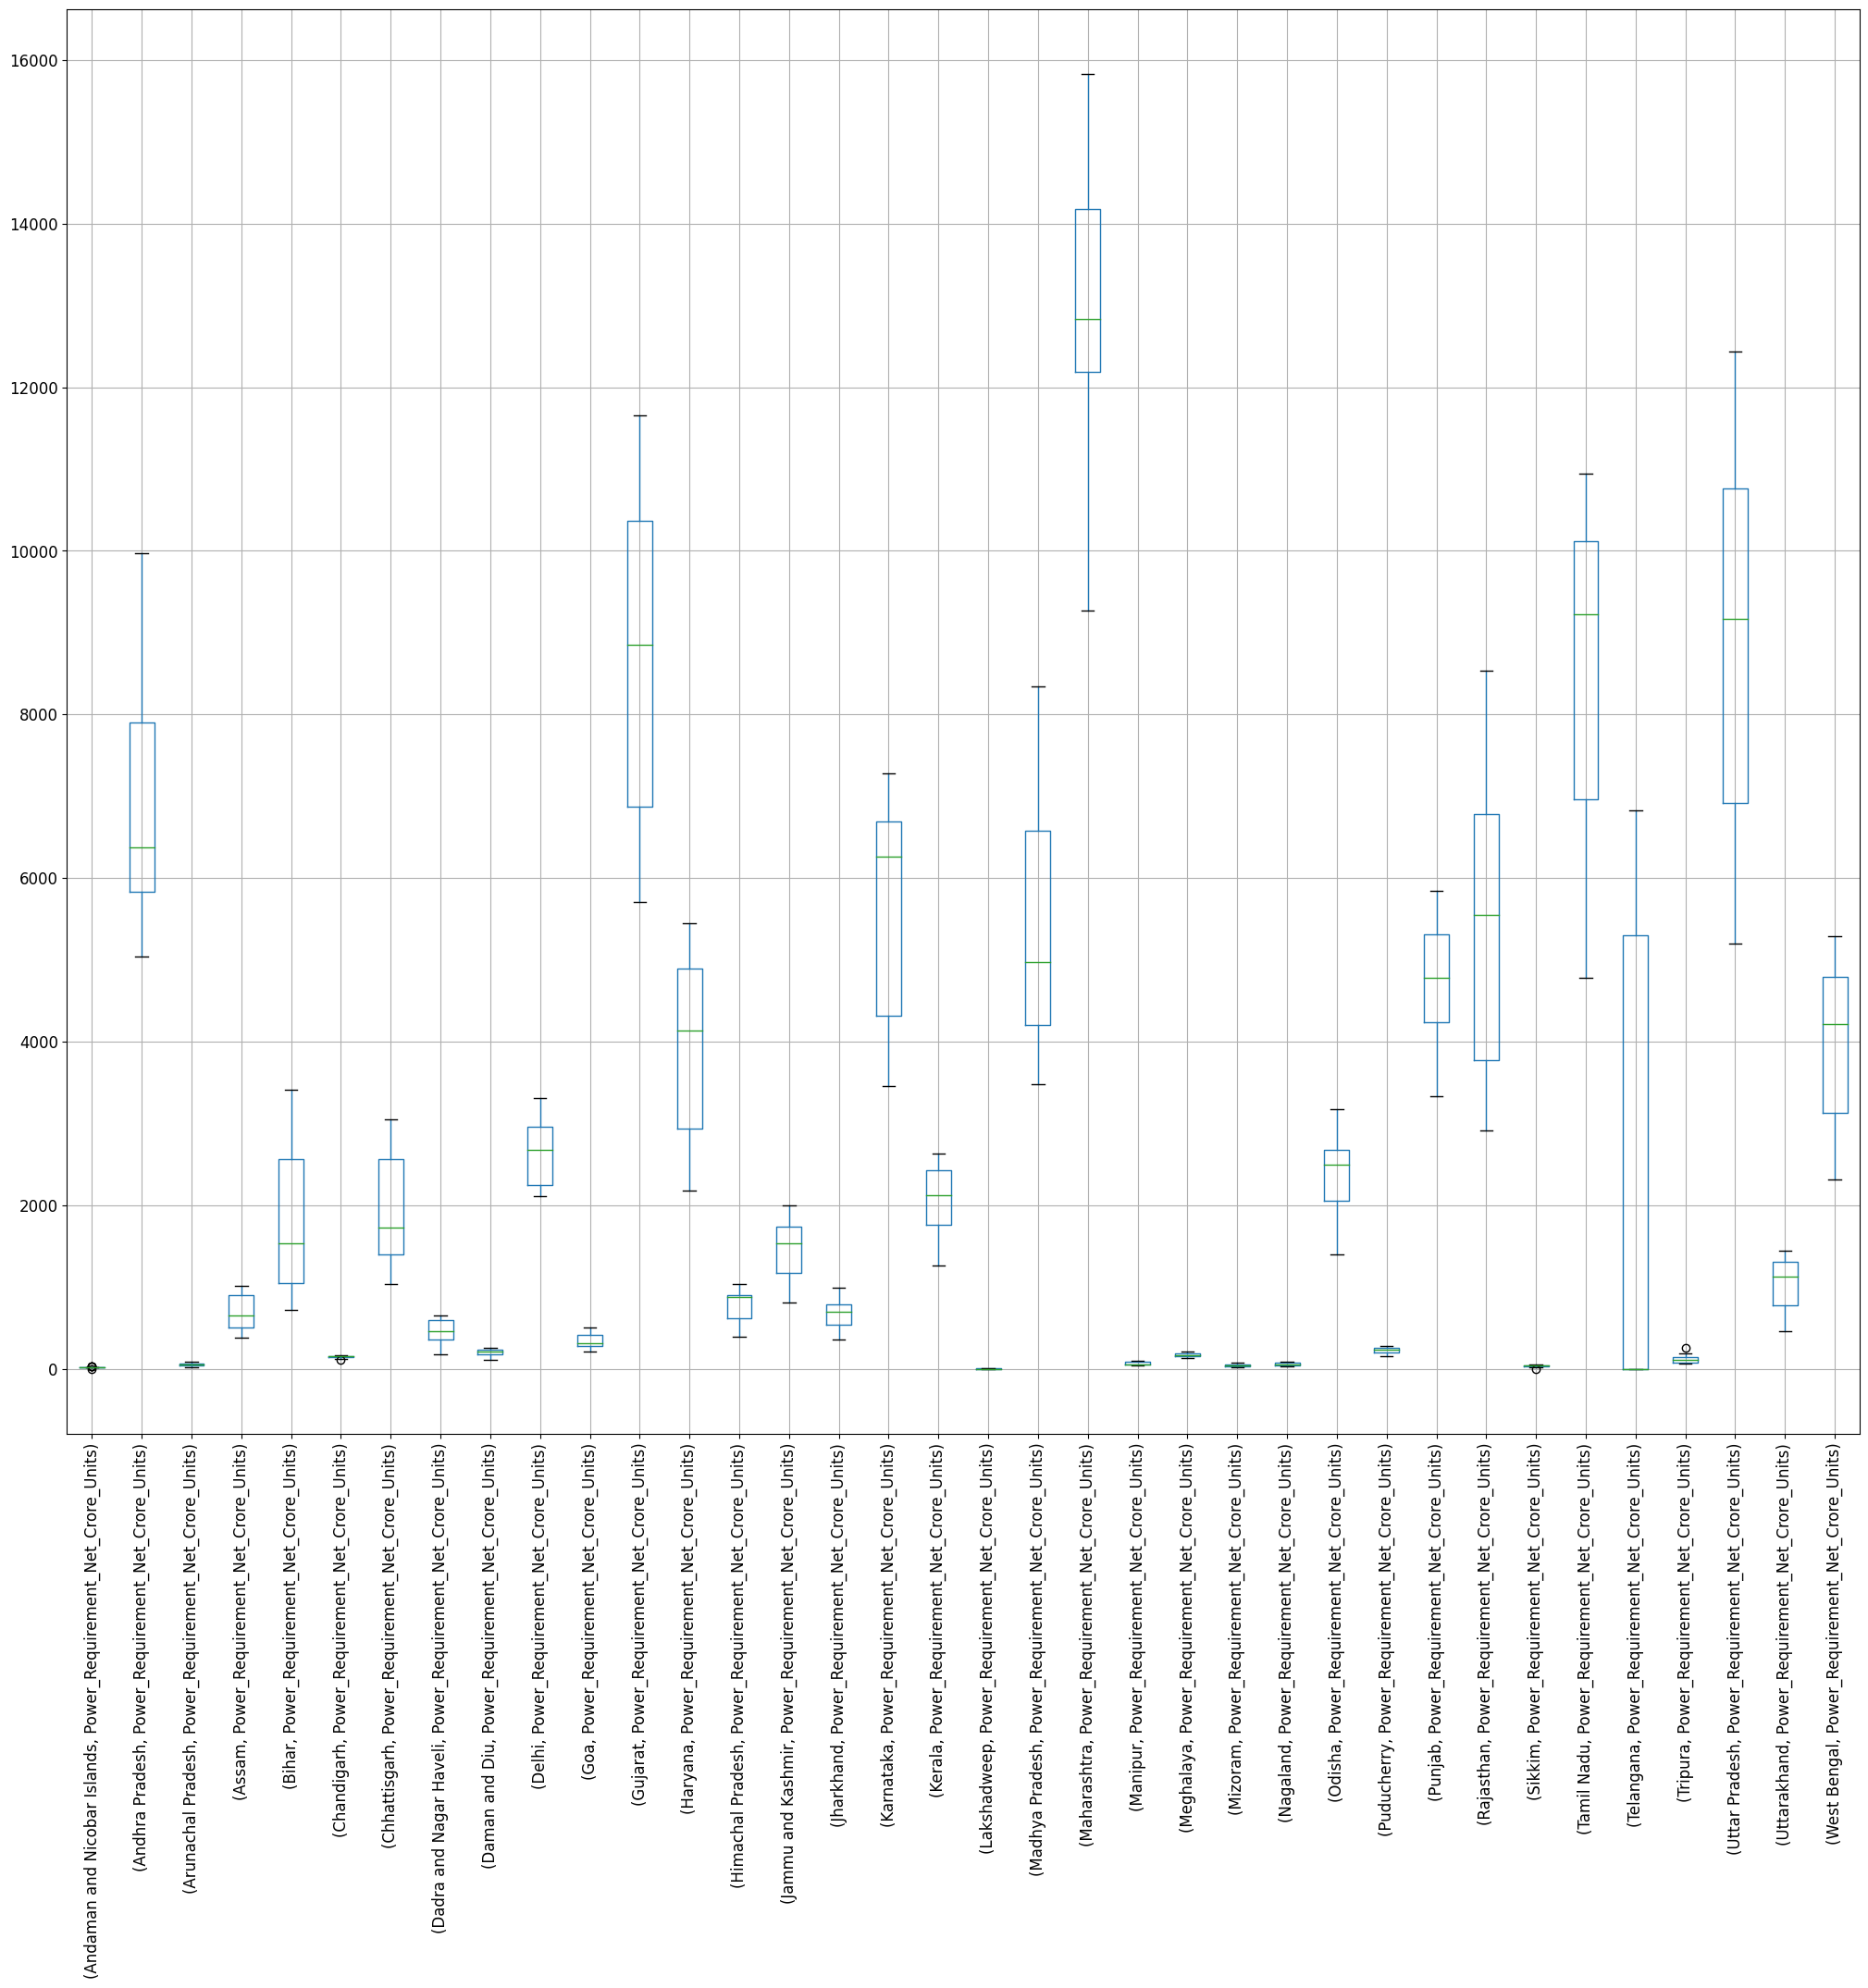

In [25]:
power_req_state_grp = power_infra.groupby('State/Union Territory')

power_req_state_grp.boxplot(column = 'Power_Requirement_Net_Crore_Units',
                            subplots = False,
                            rot = 90, fontsize=12, figsize=(25,20))


<Axes: >

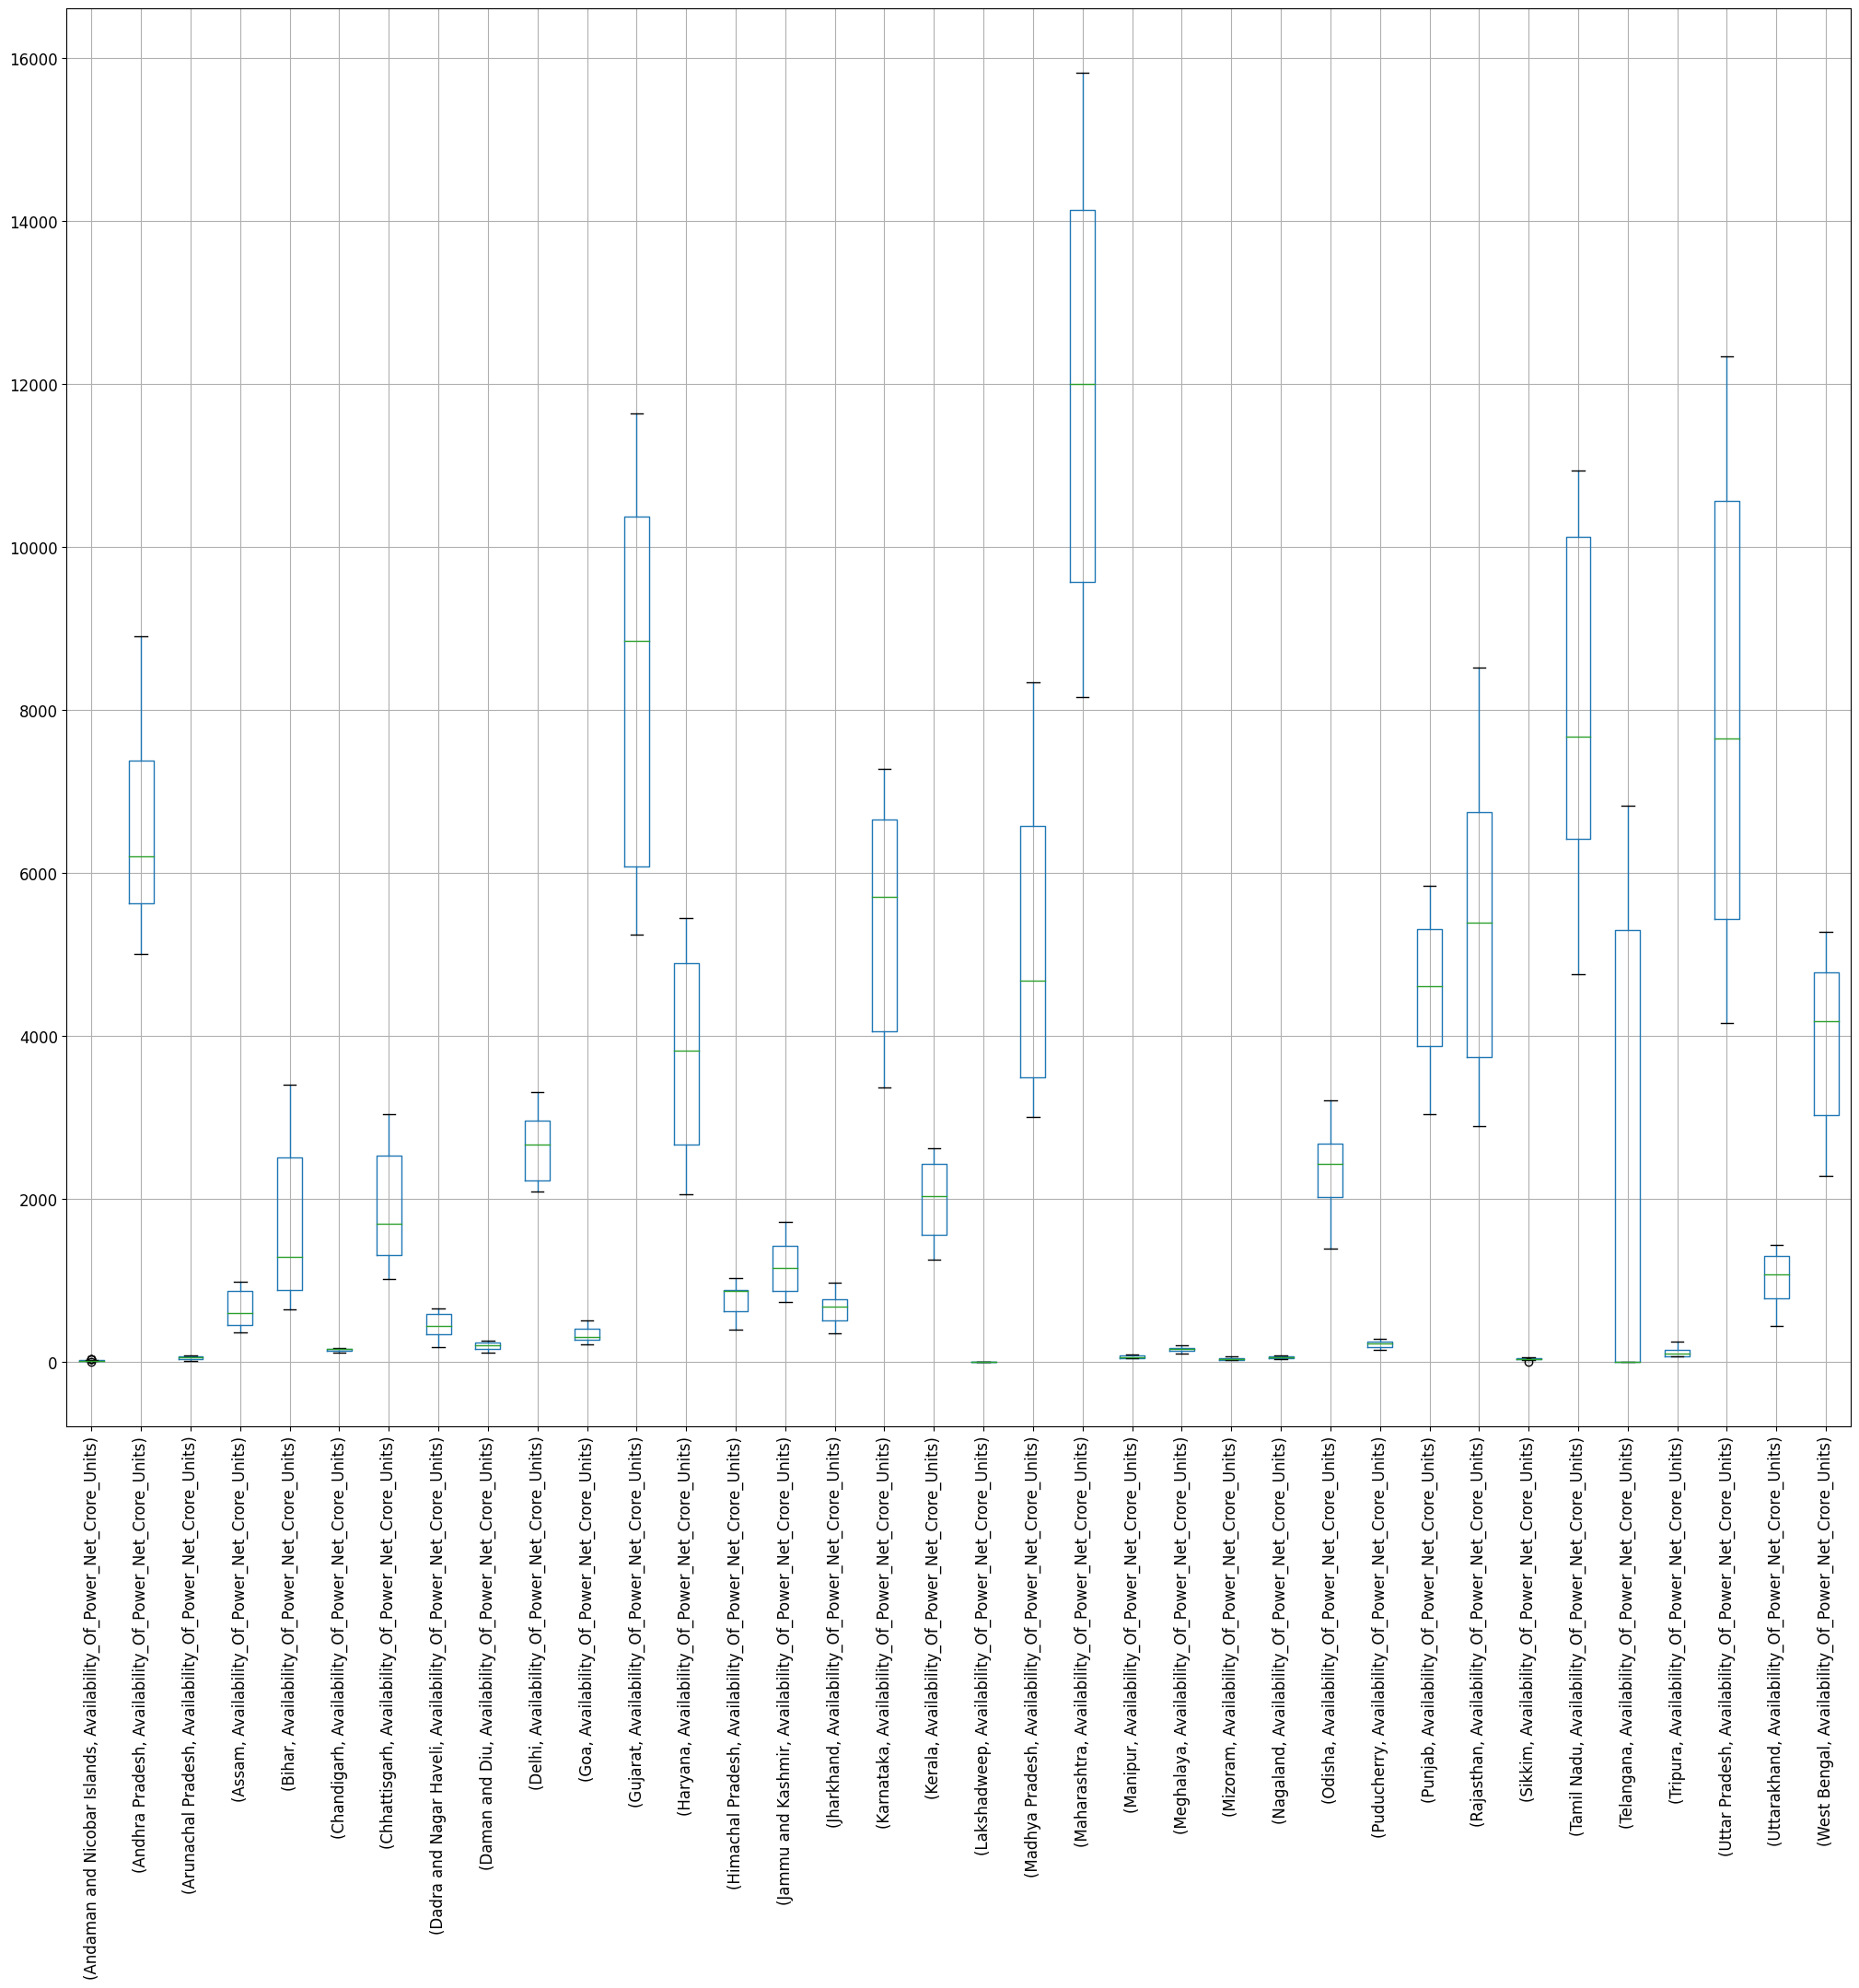

In [26]:
power_req_state_grp.boxplot(column = 'Availability_Of_Power_Net_Crore_Units',
                            subplots = False,
                            rot = 90, fontsize=12, figsize=(25,20))


<Axes: >

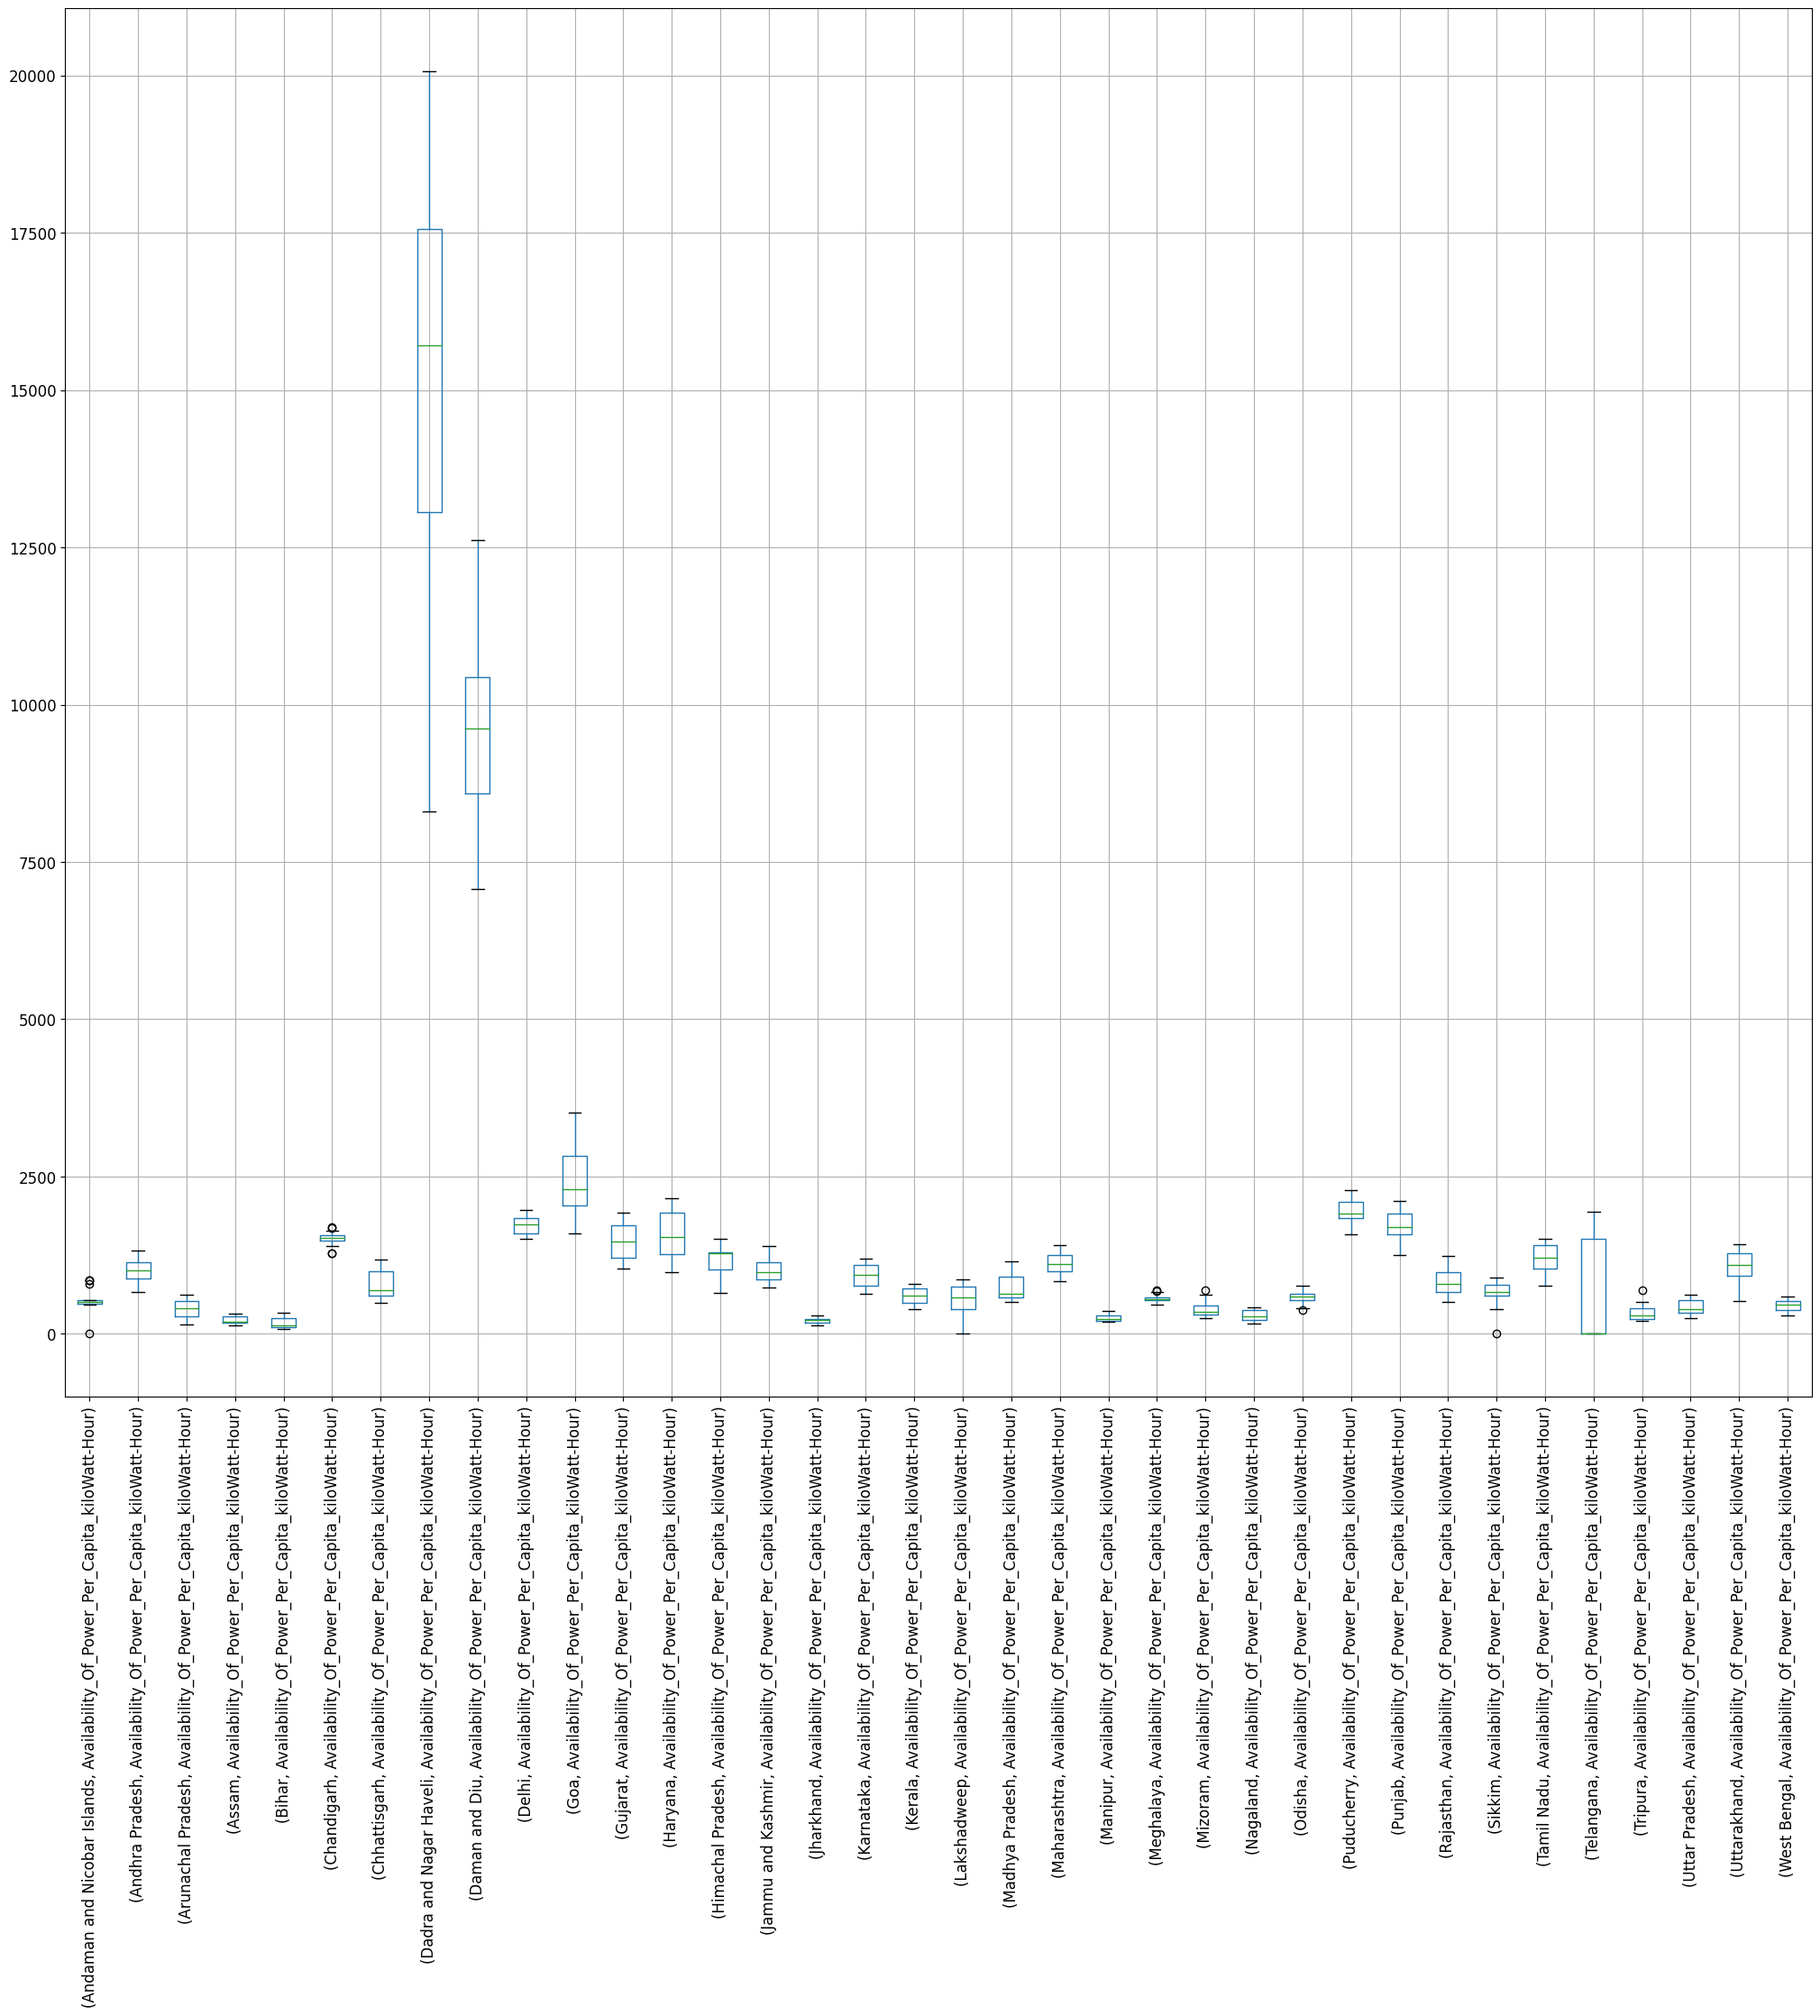

In [27]:
power_req_state_grp.boxplot(column = 'Availability_Of_Power_Per_Capita_kiloWatt-Hour',
                            subplots = False,
                            rot = 90, fontsize=12, figsize=(25,20))


<Axes: >

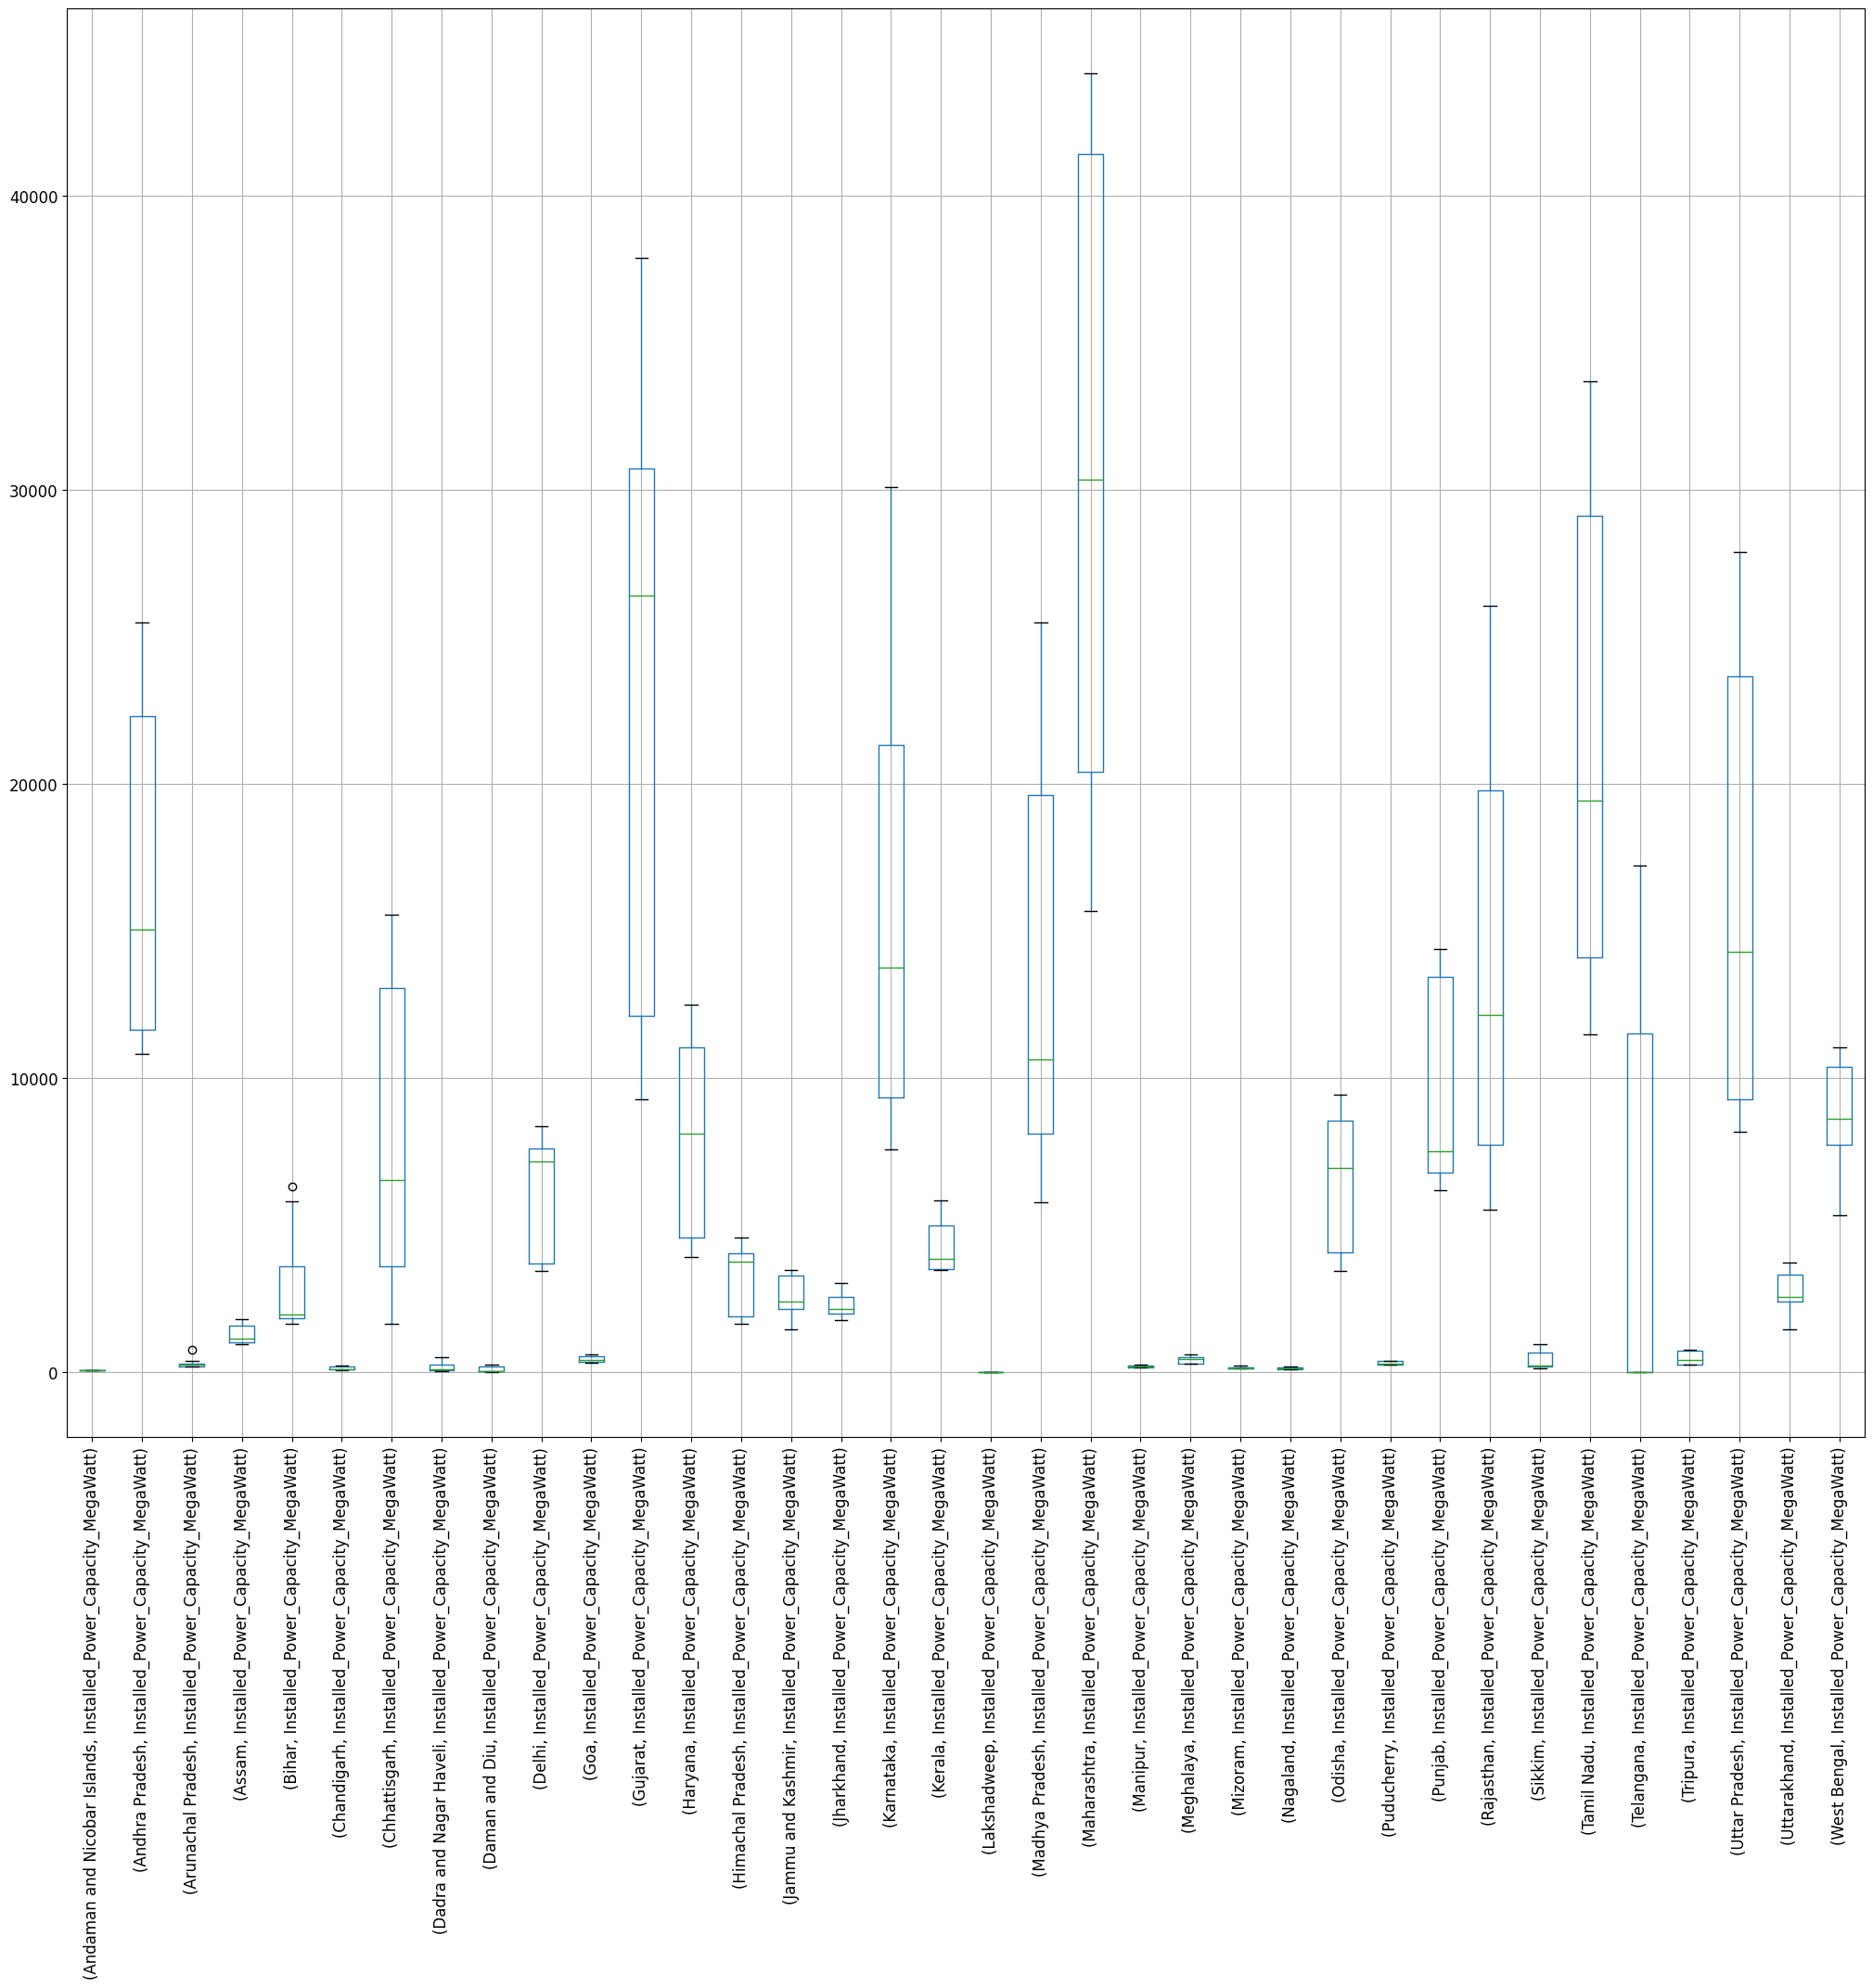

In [28]:
power_req_state_grp.boxplot(column = 'Installed_Power_Capacity_MegaWatt',
                            subplots = False,
                            rot = 90, fontsize=12, figsize=(25,20))

## Step 2.c

### Step 2.c.i - Simple Random Sampling to select a subset of states

In [29]:
states = power_infra['State/Union Territory'].unique()
states

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', ..., 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Length: 36
Categories (36, object): ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', ...,
                          'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [30]:
# To select 5 states randomly

rand_states = np.random.choice(states, 5)
rand_states

array(['Arunachal Pradesh', 'Rajasthan', 'Manipur', 'Sikkim', 'Bihar'],
      dtype=object)

## Step 2.c.ii - Stratified Sampling

The power_infra dataset can be stratified by States or Union Territories based on specific criteria such as power demand or installed capacity.

**Advantages:**
1.   Stratified sampling ensures that each subgroup is represented in the sample making the sample more representative of the population as a whole.
2.   It allows for more precise estimates for each stratum, especially when there is significant variation within the strata

**Disadvantages:**
*   More complex than simple random sampling
*   Selecting the appropriate stratification criteria may be subjective and could introduce bias if not chosen carefully.





### Step 2.c.iii - Descriptive Statistics

In [31]:
req_avail_data = power_infra.loc[:,['State/Union Territory', 'Power_Requirement_Net_Crore_Units', 'Availability_Of_Power_Net_Crore_Units']]
req_avail_data.head()

,State/Union Territory,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units
0,Andaman and Nicobar Islands,0,0
1,Andhra Pradesh,5042,5006
2,Arunachal Pradesh,16,16
3,Assam,379,358
4,Bihar,720,648


In [32]:
# To compute the mean

req_avail_data.iloc[:,1:].mean(axis = 0)

Power_Requirement_Net_Crore_Units        2640.746732
Availability_Of_Power_Net_Crore_Units    2513.454248
dtype: float64

In [33]:
# To compute the median

req_avail_data.iloc[:,1:].median(axis = 0)

Power_Requirement_Net_Crore_Units        982.5
Availability_Of_Power_Net_Crore_Units    887.5
dtype: float64

In [34]:
# To compute the standard deviation

req_avail_data.iloc[:,1:].std(axis = 0)

Power_Requirement_Net_Crore_Units        3390.529156
Availability_Of_Power_Net_Crore_Units    3234.833732
dtype: float64

### Step 2.c.iv - Visualizing distribution of power requirements and availability across states

Andaman and Nicobar Islands         Axes(0.1,0.792857;0.114286x0.107143)
Andhra Pradesh                 Axes(0.237143,0.792857;0.114286x0.107143)
Arunachal Pradesh              Axes(0.374286,0.792857;0.114286x0.107143)
Assam                          Axes(0.511429,0.792857;0.114286x0.107143)
Bihar                          Axes(0.648571,0.792857;0.114286x0.107143)
Chandigarh                     Axes(0.785714,0.792857;0.114286x0.107143)
Chhattisgarh                        Axes(0.1,0.664286;0.114286x0.107143)
Dadra and Nagar Haveli         Axes(0.237143,0.664286;0.114286x0.107143)
Daman and Diu                  Axes(0.374286,0.664286;0.114286x0.107143)
Delhi                          Axes(0.511429,0.664286;0.114286x0.107143)
Goa                            Axes(0.648571,0.664286;0.114286x0.107143)
Gujarat                        Axes(0.785714,0.664286;0.114286x0.107143)
Haryana                             Axes(0.1,0.535714;0.114286x0.107143)
Himachal Pradesh               Axes(0.237143,0.5357

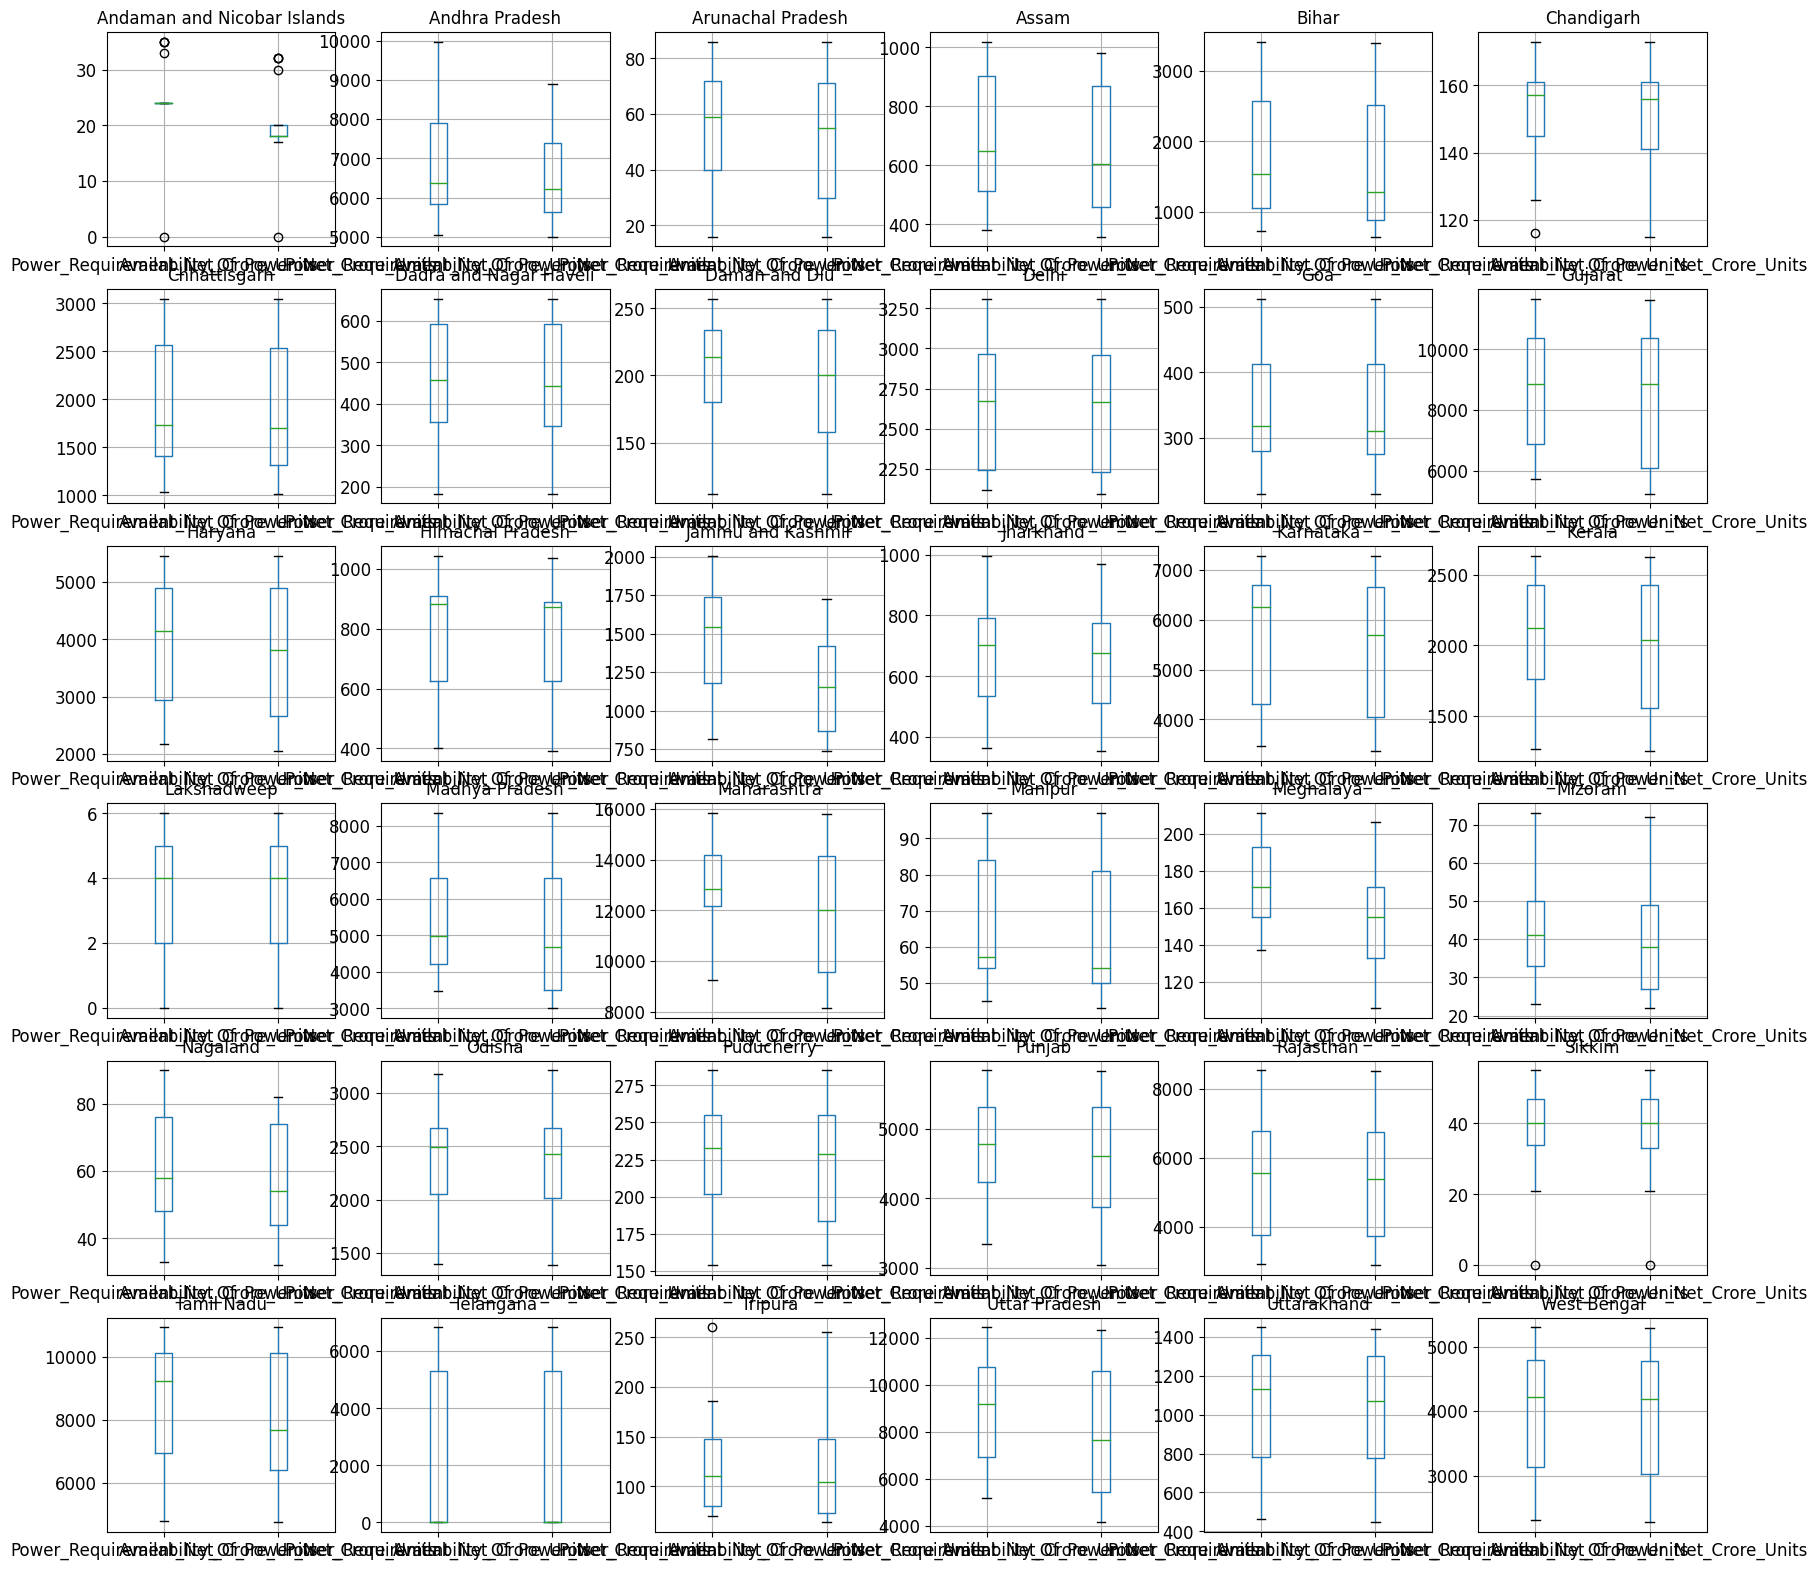

In [35]:
power_req_avail_state_grp = req_avail_data.groupby('State/Union Territory')

power_req_avail_state_grp.boxplot(column = ['Power_Requirement_Net_Crore_Units', 'Availability_Of_Power_Net_Crore_Units'],
                                  sharey = False,
                                  fontsize=12, figsize=(20,20))


### Step 2.c.v - Random Variables:

In [36]:
rand_states

array(['Arunachal Pradesh', 'Rajasthan', 'Manipur', 'Sikkim', 'Bihar'],
      dtype=object)

In [37]:
rand_state_power_req_avail = power_req_avail_state_grp.filter(lambda x: x.name in rand_states)
rand_state_power_req_avail.head()

,State/Union Territory,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units
2,Arunachal Pradesh,16,16
4,Bihar,720,648
21,Manipur,54,52
28,Rajasthan,2921,2897
29,Sikkim,0,0


In [38]:
# Define a new random variable X

rand_state_power_req_avail['X']  = rand_state_power_req_avail['Power_Requirement_Net_Crore_Units'] - rand_state_power_req_avail['Availability_Of_Power_Net_Crore_Units']
rand_state_power_req_avail.head()

,State/Union Territory,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,X
2,Arunachal Pradesh,16,16,0
4,Bihar,720,648,72
21,Manipur,54,52,2
28,Rajasthan,2921,2897,24
29,Sikkim,0,0,0


array([[<Axes: title={'center': 'X'}>]], dtype=object)

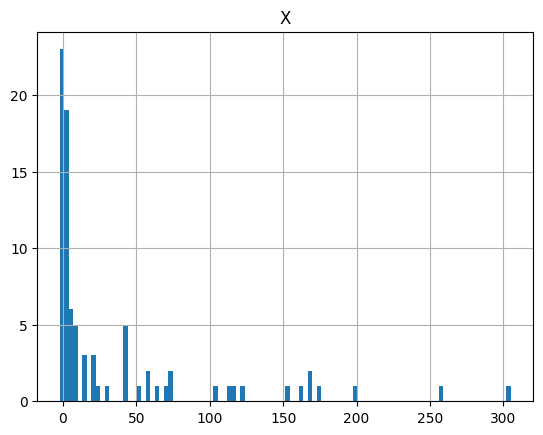

In [39]:
# Distribution of Column X

rand_state_power_req_avail.hist(column = 'X', bins = 100)   # Observation - Multimodal distribution

**Empirical Probability Distribution of X**

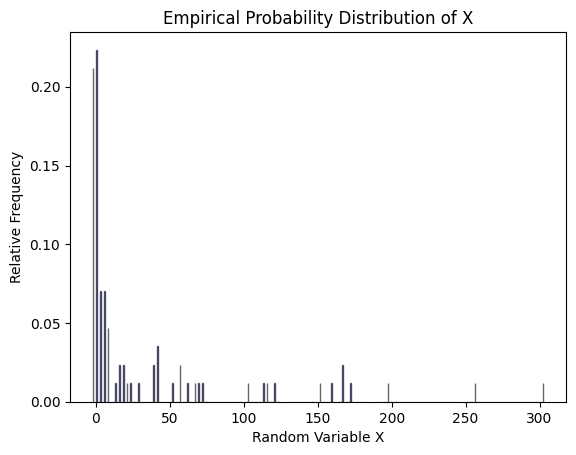

,Value_of_X,Emperical_Probability
0,-2.000000,0.211765
1,0.558333,0.223529
2,3.116667,0.070588
3,5.675000,0.070588
4,8.233333,0.047059
5,10.791667,0.000000
6,13.350000,0.011765
7,15.908333,0.023529


In [40]:
# Create a histogram
hist, bins = np.histogram(rand_state_power_req_avail['X'], bins=120)  # Adjust the bin edges based on your data

# Calculate relative frequencies
total_data_points = len(rand_state_power_req_avail)
relative_frequencies = hist / total_data_points

# Plot the histogram
plt.bar(bins[:-1], relative_frequencies, width=0.5, align='center', alpha=0.6, color='b', edgecolor='k')
plt.xlabel('Random Variable X')
plt.ylabel('Relative Frequency')
plt.title('Empirical Probability Distribution of X')
plt.show()

print('\n')
emperical_probability_dist = pd.DataFrame({'Value_of_X' : [bins[i] for i in range(len(bins) - 1)], 'Emperical_Probability': [relative_frequencies[i] for i in range(len(bins) - 1)]})
emperical_probability_dist.head(8)

In [41]:
 # To plot a displot showing Probability density function (pdf) using Kernel Density Estimator (KDE)

fig = ff.create_distplot([rand_state_power_req_avail['X']], group_labels = 'X'  , bin_size = 12)
fig.show()

**Empirical Cumulative Probability Distribution of X**

Method 1

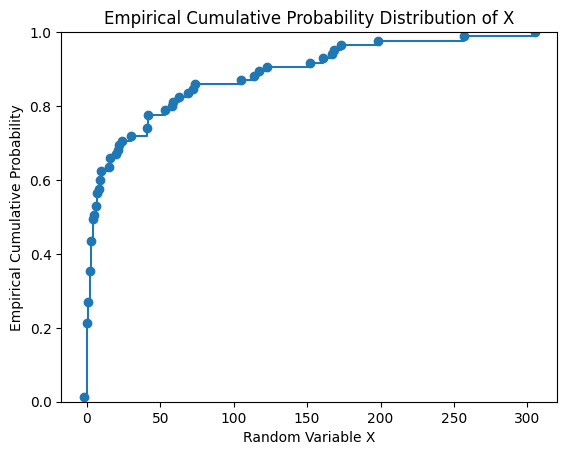

,Value_of_X,Emperical_Probability
0,-2,0.011765
1,0,0.211765
2,1,0.270588
3,2,0.352941
4,3,0.435294


In [42]:
# To calculate the empirical cumulative probability distribution of X

X_col = rand_state_power_req_avail['X']
unique_X = np.sort((X_col).unique())

ecdf_list = []
for value in unique_X:
    cumulative_probability = np.sum(X_col <= value) / len(X_col)
    ecdf_list.append(cumulative_probability)

# Plot the empirical cumulative distribution
plt.step(unique_X, ecdf_list, where='post', marker='o')
plt.xlabel('Random Variable X')
plt.ylabel('Empirical Cumulative Probability')
plt.title('Empirical Cumulative Probability Distribution of X')
plt.ylim(0, 1)  # Ensure the y-axis ranges from 0 to 1
plt.show()

print('\n')
emperical_cumul_probability_dist = pd.DataFrame({'Value_of_X' : unique_X, 'Emperical_Probability': [ecdf_list[i] for i in range(len(unique_X))]})
emperical_cumul_probability_dist.head()


Method 2

In [43]:
# To calculate the empirical cumulative probability distribution of X

ecdf = ECDF(rand_state_power_req_avail['X'])   # Fit a Cumulative Distribution Function
ecdf

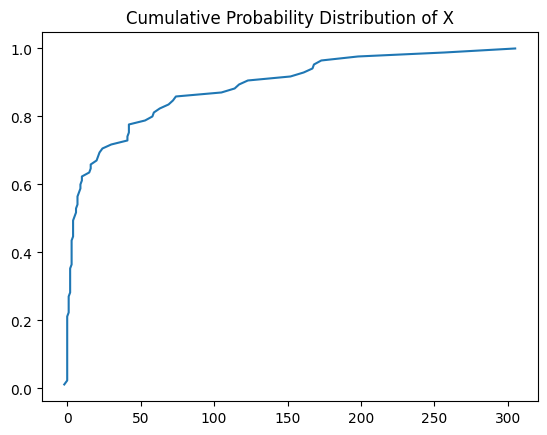

In [44]:
# To plot the cdf
plt.plot(ecdf.x, ecdf.y)

plt.title('Cumulative Probability Distribution of X')
plt.xlabel = 'X = Power Requirement - Power Availability '
plt.ylabel = 'Probability'
plt.show()

Method 3

In [45]:
# To plot the cdf usning interactive plotly

fig = px.ecdf(rand_state_power_req_avail['X'], x='X')
fig.show()

### Step 2.c.vi - To find probability P(X> 0)

Method 1

In [46]:
# Assuming you have already calculated the empirical probability distribution
# You can use the 'relative_frequencies' and 'bins' variables from the previous code

# Find the index of the first positive value in 'bins' (assuming 'bins' is sorted)
first_positive_idx = next((i for i, val in enumerate(bins) if val > 0), None)

# Calculate the probability P(X > 0)
probability_x_greater_than_zero = 1 - np.sum(relative_frequencies[:first_positive_idx])
print('P(X > 0): %.3f' % (probability_x_greater_than_zero))

P(X > 0): 0.788


Method 2

In [47]:
probability_x_greater_than_zero = 1 - ecdf_list[first_positive_idx]
print('P(X > 0): %.3f' % (probability_x_greater_than_zero))

P(X > 0): 0.788


### Step 2.c.vii - Expectated power requirement  

Method 1 - Using histogram

In [48]:
from importlib import reload
plt=reload(plt)

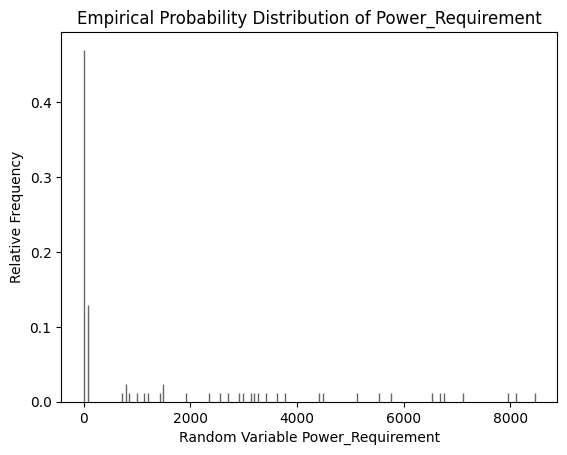

,Power_Requirement,Emperical_Probability
0,0.000000,0.470588
1,71.091667,0.129412
2,142.183333,0.000000
3,213.275000,0.000000
4,284.366667,0.000000
5,355.458333,0.000000
6,426.550000,0.000000
7,497.641667,0.000000


In [49]:
# To calculate the empirical  probability distribution of  power requirement

power_req = rand_state_power_req_avail['Power_Requirement_Net_Crore_Units']

# Create a histogram
hist, bins = np.histogram(power_req, bins=120)  # Adjust the bin edges based on your data

# Calculate relative frequencies
total_data_points = len(rand_state_power_req_avail)
relative_frequencies = hist / total_data_points

# Plot the histogram
plt.bar(bins[:-1], relative_frequencies, width=0.5, align='center', alpha=0.6, color='b', edgecolor='k')
plt.xlabel('Random Variable Power_Requirement')
plt.ylabel('Relative Frequency')
plt.title('Empirical Probability Distribution of Power_Requirement')
plt.show()

print('\n')
emperical_probability_dist = pd.DataFrame({'Power_Requirement' : [bins[i] for i in range(len(bins) - 1)], 'Emperical_Probability': [relative_frequencies[i] for i in range(len(bins) - 1)]})
emperical_probability_dist.head(8)

In [50]:
# Calculate the expected power requirement

# E(X)=∑ x.⋅P(X=x)

expected_power_requirement = 0
for i in range(len(emperical_probability_dist)):
  expected_power_requirement += emperical_probability_dist.iloc[i, 0] * emperical_probability_dist.iloc[i, 1]

expected_power_requirement

1463.651960784314

Method 2 - Using Frequency table

**Function to find the frequency table for a given column**

In [51]:
def find_freq_table(df, col):
  # Create a frequency table for col in df
  frequency_table = df.value_counts().reset_index()
  frequency_table.columns = [col, 'Frequency']

  # Calculate the total number of entries
  total_data_points  = len(df)

  # Calculate empirical probabilities
  frequency_table['Probability'] = frequency_table['Frequency'] / total_data_points

  # Sort the table by col
  frequency_table = frequency_table.sort_values(by=col)


  plt.bar(frequency_table[col], frequency_table['Probability'], width=0.5, align='center', alpha=0.6, color='b', edgecolor='k')

  return frequency_table


**Function to find the expectation of a given column**

In [52]:
def find_expectation(freq_table):
  # E(X)=∑ x.⋅P(X=x)

  col_names = freq_table.columns
  expected_value = np.sum(freq_table[col_names[0]] * freq_table[col_names[2]])
  return expected_value

**To find the expected power requirement**

,Power_Requirement_Net_Crore_Units,Frequency,Probability
43,0,1,0.011765
10,16,1,0.011765
6,21,2,0.023529
49,22,1,0.011765
7,29,2,0.023529


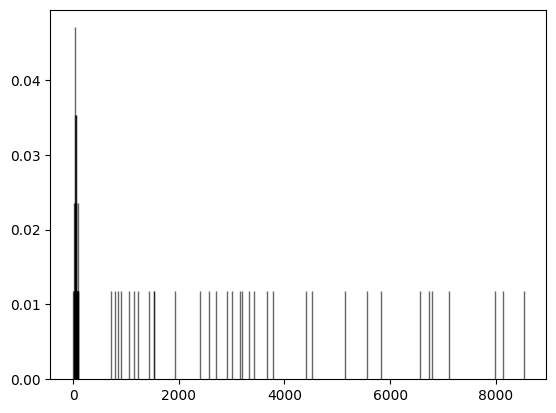

In [53]:
power_req = rand_state_power_req_avail['Power_Requirement_Net_Crore_Units']

# Create a frequency table for Power_Requirement_Net_Crore_Units
frequency_table = find_freq_table(power_req, 'Power_Requirement_Net_Crore_Units')

# Display the empirical probability distribution
print('\n')
pd.DataFrame(frequency_table).head()

In [54]:
# Calculate the expected power requirement

expected_power_requirement = find_expectation(frequency_table)
expected_power_requirement

1498.2235294117647

### Step 2.c.viii - Expectated per capita power availability for all states

,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Frequency,Probability
0,0.0,13,0.021242
386,78.0,1,0.001634
399,87.0,1,0.001634
382,93.3,1,0.001634
305,95.6,1,0.001634


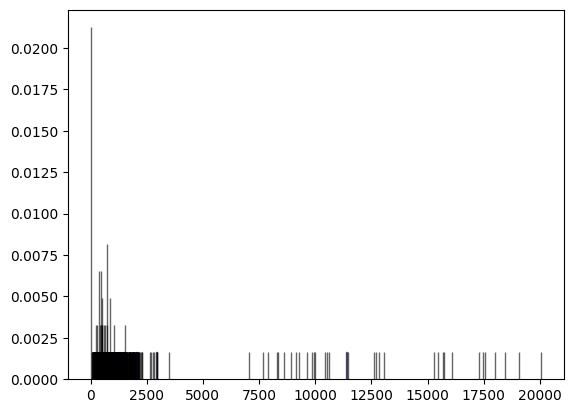

In [55]:
power_avail_per_cap = power_infra['Availability_Of_Power_Per_Capita_kiloWatt-Hour']

# Create a frequency table for Availability_Of_Power_Per_Capita_kiloWatt-Hour
frequency_table = find_freq_table(power_avail_per_cap, 'Availability_Of_Power_Per_Capita_kiloWatt-Hour')

# Display the empirical probability distribution
print('\n')
pd.DataFrame(frequency_table).head()

In [56]:
# Calculate the expected power availability per capita for all states

expected_power_avail = find_expectation(frequency_table)
expected_power_avail

1515.8516339869282

### Step 2.c.ix - Expectated installed power capacity

,Installed_Power_Capacity_MegaWatt,Frequency,Probability
6,114,2,0.023529
43,141,1,0.011765
0,158,7,0.082353
41,159,1,0.011765
1,179,4,0.047059


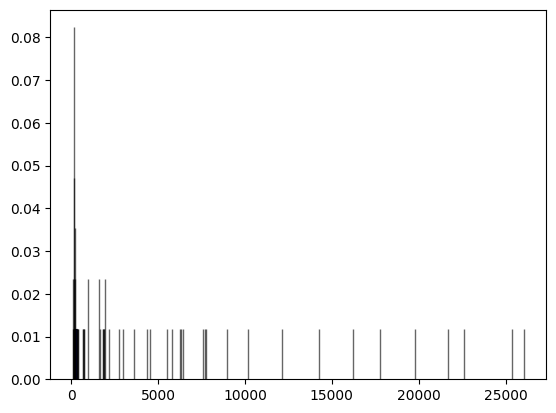

In [57]:
indexes = rand_state_power_req_avail.index
power_installed = power_infra.loc[indexes, 'Installed_Power_Capacity_MegaWatt']

# Create a frequency table for Power_Requirement_Net_Crore_Units
frequency_table = find_freq_table(power_installed, 'Installed_Power_Capacity_MegaWatt')

# Display the empirical probability distribution
print('\n')
pd.DataFrame(frequency_table).head()

In [58]:
# Calculate the expected installed power capacity

expected_power_installed = find_expectation(frequency_table)
expected_power_installed

3526.5647058823533

### Step 2.c.x -	Calculate the sample mean and variance of the "Power Requirement Net Crore Units" for states with a population size greater than 1 million.

In [59]:
power_infra['Population'] = power_infra['Availability_Of_Power_Net_Crore_Units'] * 1000000 / power_infra['Availability_Of_Power_Per_Capita_kiloWatt-Hour']
print(power_infra.shape, '\n')
power_infra[['State/Union Territory', 'Population']].head()

(612, 7) 



,State/Union Territory,Population
0,Andaman and Nicobar Islands,NaN
1,Andhra Pradesh,7.620642e+06
2,Arunachal Pradesh,1.111883e+05
3,Assam,2.663690e+06
4,Bihar,8.307692e+06


In [60]:
POPULATION_THRESHOLD = 1000000

filtered_dataset = power_infra[power_infra['Population'] > POPULATION_THRESHOLD]
print(filtered_dataset.shape, '\n')

(340, 7) 



In [61]:
power_req = filtered_dataset['Power_Requirement_Net_Crore_Units']

sample_mean = power_req.mean()

print('Sample Mean:', sample_mean)

Sample Mean: 4600.844117647059


In [62]:

sample_variance = power_req.var()

print('Sample Variance:', sample_variance)

Sample Variance: 12007710.002177684


Step 2.c.xi -	Calculate the sample mean and variance of the "Power Requirement Net Crore Units" for states with a population size less than 1 million.

In [63]:
filtered_dataset = power_infra[~ power_infra.index.isin(filtered_dataset.index)]

print(filtered_dataset.shape, '\n')
filtered_dataset.head()

(272, 7) 



,State/Union Territory,Year,Power_Requirement_Net_Crore_Units,Availability_Of_Power_Net_Crore_Units,Availability_Of_Power_Per_Capita_kiloWatt-Hour,Installed_Power_Capacity_MegaWatt,Population
0,Andaman and Nicobar Islands,2004-05,0,0,0.0,65,NaN
2,Arunachal Pradesh,2004-05,16,16,143.9,187,111188.325226
5,Chandigarh,2004-05,116,115,1274.7,79,90217.306033
7,Dadra and Nagar Haveli,2004-05,183,183,8299.7,38,22048.989723
8,Daman and Diu,2004-05,112,112,7073.1,14,15834.641105


In [64]:
power_req = filtered_dataset['Power_Requirement_Net_Crore_Units']

sample_mean = power_req.mean()

print('Sample Mean:', sample_mean)

Sample Mean: 190.625


In [65]:

sample_variance = power_req.var()

print('Sample Variance:', sample_variance)

Sample Variance: 52160.906826568265


### Step 2.c.xii -	Compute the skewness of the "Availability Of Power Net Crore Units" for all states

In [66]:
power_avail = power_infra['Availability_Of_Power_Net_Crore_Units']

skew_avail = skew(power_avail)

print('Skewness for Availability_Of_Power_Net_Crore_Units:', skew_avail)

Skewness for Availability_Of_Power_Net_Crore_Units: 1.5796751778877218


### Step 2.c.xiii -	Calculate the skewness of the "Power Requirement Net Crore Units" for states with a population size greater than 500,000.

In [67]:
POPULATION_THRESHOLD = 500000

filtered_dataset = power_infra[power_infra['Population'] > POPULATION_THRESHOLD]
print(filtered_dataset.shape, '\n')

(364, 7) 



In [68]:
power_req = filtered_dataset['Power_Requirement_Net_Crore_Units']

skew_req = skew(power_req)
print('Skewness for Power_Requirement_Net_Crore_Units:', skew_req)

Skewness for Power_Requirement_Net_Crore_Units: 1.0626627738190983


### Step 2.c.xiv -	Stratify the states into three clusters based on their population size: small, medium, and large. Define the thresholds for each cluster.

In [69]:
np.min(power_infra['Population'])

5054.334091483447

In [70]:
np.max(power_infra['Population'])

19961251.037918627

In [71]:
# Define population thresholds for each cluster
SMALL_THRESHOLD = 2500000  # 2.5 million
MEDIUM_THRESHOLD = 10000000  # 10 million

# Create a new column 'Population_Category' to store the cluster labels
power_infra['Population_Category'] = 'Small'  # Initialize all as 'Small'

# Update the cluster labels based on population size
power_infra.loc[power_infra['Population'] > SMALL_THRESHOLD, 'Population_Category'] = 'Medium'
power_infra.loc[power_infra['Population'] > MEDIUM_THRESHOLD, 'Population_Category'] = 'Large'

# Print the updated dataset with population categories
power_infra[['State/Union Territory', 'Population', 'Population_Category']].head()

,State/Union Territory,Population,Population_Category
0,Andaman and Nicobar Islands,NaN,Small
1,Andhra Pradesh,7.620642e+06,Medium
2,Arunachal Pradesh,1.111883e+05,Small
3,Assam,2.663690e+06,Medium
4,Bihar,8.307692e+06,Medium


## Step 2.c.xv - Calculate the mean, median, and standard deviation of "Power Requirement Net Crore Units" for each cluster

**Function for finding mean, median, standard deviation a given column for a cluster**

In [72]:
def find_cluster_stats(pop_category, column):
  filtered_dataset = power_infra[power_infra['Population_Category'] == pop_category]
  power_req_category = filtered_dataset[column]

  print('Mean:', np.mean(power_req_category))
  print('Median:', np.median(power_req_category))
  print('Sample deviation:', np.std(power_req_category))


In [73]:
# For small cluster

find_cluster_stats('Small', 'Power_Requirement_Net_Crore_Units')

Mean: 571.0741839762611
Median: 164.0
Sample deviation: 910.0033148689104


In [74]:
# For medium cluster

find_cluster_stats('Medium', 'Power_Requirement_Net_Crore_Units')

Mean: 4647.100840336135
Median: 4608.5
Sample deviation: 3049.7203533322045


In [75]:
# For large cluster

find_cluster_stats('Large', 'Power_Requirement_Net_Crore_Units')

Mean: 8585.81081081081
Median: 9165.0
Sample deviation: 4713.039031257156


### Step 2.c.xvi - Calculate the mean, median, and standard deviation of "Availability Of Power Net Crore Units" for each cluster.

In [76]:
# For small cluster

find_cluster_stats('Small', 'Availability_Of_Power_Net_Crore_Units')

Mean: 536.2017804154302
Median: 158.0
Sample deviation: 852.3643922686545


In [77]:
# For medium cluster

find_cluster_stats('Medium', 'Availability_Of_Power_Net_Crore_Units')

Mean: 4453.621848739495
Median: 4350.0
Sample deviation: 2879.7488335611115


In [78]:
# For large cluster

find_cluster_stats('Large', 'Availability_Of_Power_Net_Crore_Units')

Mean: 8042.486486486487
Median: 7645.0
Sample deviation: 4737.811609214953


### Step 2.c.xvii - Create box plots to visualize the distribution of power requirements and availability within each cluster.

In [79]:
# For Power Requirement

px.box(power_infra, y = 'Power_Requirement_Net_Crore_Units', facet_col = 'Population_Category',
       color = 'Population_Category', title = 'Power Requirement distribution in each category')

In [80]:
# For Power Availability

px.box(power_infra, y = 'Availability_Of_Power_Net_Crore_Units', facet_col = 'Population_Category',
       color = 'Population_Category', title = 'Power Requirement distribution in each category')

### Step 2.d -	Search online for projected population data for the next few years and use it to forecast the expected Power Requirements for each state. If you are making any assumptions for this calculation, state them clearly.

**To find the statewise per capita power consumption**

In [81]:
power_infra['Power_Consumption_Per_Capita'] = power_infra['Power_Requirement_Net_Crore_Units'] / power_infra['Population']

power_consumption_state_grp = power_infra.groupby('State/Union Territory')['Power_Consumption_Per_Capita'].mean()
pd.DataFrame(power_consumption_state_grp.head())

,Power_Consumption_Per_Capita
State/Union Territory,
Andaman and Nicobar Islands,0.000718
Andhra Pradesh,0.001045
Arunachal Pradesh,0.000421
Assam,0.000232
Bihar,0.000182


**To generate state-wise projected population dataset**

In [82]:
state_list = power_infra['State/Union Territory'].unique()
state_list

['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', ..., 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Length: 36
Categories (36, object): ['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', ...,
                          'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']

In [83]:
# Cartesian product to generate year-wise entries for each state

projected_populations = pd.DataFrame(itertools.product(state_list, ['2021-22', '2022-23', '2023-24', '2024-25']), columns = ['State/Union Territory', 'Year'])
projected_populations['Population'] = np.NaN
projected_populations.head(6)

,State/Union Territory,Year,Population
0,Andaman and Nicobar Islands,2021-22,NaN
1,Andaman and Nicobar Islands,2022-23,NaN
2,Andaman and Nicobar Islands,2023-24,NaN
3,Andaman and Nicobar Islands,2024-25,NaN
4,Andhra Pradesh,2021-22,NaN
5,Andhra Pradesh,2022-23,NaN


In [84]:
projected_populations.to_csv('projected_populations.csv' , index = False)

**After entering the projected population data in the downloaded csv file**

Source of projected population data -

https://main.mohfw.gov.in/sites/default/files/Population%20Projection%20Report%202011-2036%20-%20upload_compressed_0.pdf


In [85]:
# Upload dataset to Colab workspace
uploaded = files.upload()

Saving projected_populations.csv to projected_populations.csv


In [86]:
# Import the dataset into a DataFrame

projected_populations = pd.read_csv('projected_populations.csv')
projected_populations['Population'] = projected_populations['Population'] * 100
projected_populations.head()

,State/Union Territory,Year,Population
0,Andaman and Nicobar Islands,2021-22,40200
1,Andaman and Nicobar Islands,2022-23,40300
2,Andaman and Nicobar Islands,2023-24,40400
3,Andaman and Nicobar Islands,2024-25,40500
4,Andhra Pradesh,2021-22,5297200


In [87]:
projected_populations_state_grp = projected_populations.groupby('State/Union Territory')

for state in state_list:
  # Retrieve the projected population values for a state from the generated dataset grouped by state
  state_population_values = projected_populations_state_grp.get_group(state)['Population'].reset_index()
  indices = state_population_values['index']
  state_population_values.drop('index', axis = 1, inplace = True)

  population_growth_rate = []

  # Find the population growth rate of the state for the years considered for projection
  for pop_ind in range(len(state_population_values) - 1):
    pop_x = state_population_values.iloc[pop_ind]
    pop_y = state_population_values.iloc[pop_ind + 1]
    population_growth_rate.append(float(((pop_y - pop_x)/ pop_x).values))

  # Find the initial forcasted power requirement/demand
  avg_power_consumption_state = power_consumption_state_grp.loc[state]
  first_projected_pop_val = state_population_values.loc[0]
  initial_forcasted_power = float(avg_power_consumption_state * first_projected_pop_val)

  forecasted_power_requirements = [initial_forcasted_power]

  # Find the forcasted power requirement using the population growth rate
  for growth_rate in population_growth_rate:
    prev_forcasted_power_req = forecasted_power_requirements[-1]
    forecasted_power_requirements.append(prev_forcasted_power_req * (1 + growth_rate))

  projected_populations.loc[projected_populations['State/Union Territory'] == state, 'Projected_Power_Req'] = pd.Series(forecasted_power_requirements, index = indices)

projected_populations

,State/Union Territory,Year,Population,Projected_Power_Req
0,Andaman and Nicobar Islands,2021-22,40200,28.868118
1,Andaman and Nicobar Islands,2022-23,40300,28.939929
2,Andaman and Nicobar Islands,2023-24,40400,29.011740
3,Andaman and Nicobar Islands,2024-25,40500,29.083551
4,Andhra Pradesh,2021-22,5297200,5536.376312
...,...,...,...,...
139,Uttarakhand,2024-25,1187400,1288.596254
140,West Bengal,2021-22,9860400,4507.482881
141,West Bengal,2022-23,9908400,4529.425113
142,West Bengal,2023-24,9956300,4551.321631
